## Домашнее задание №1: Моделирование методом Монте-карло

### Ищем массив прибыли 


In [79]:
import numpy as np
import matplotlib.pyplot as plt
import math
mean=math.log(2500**2/np.sqrt(2500**2+500**2),np.exp(1)) #пересчитываем параметры для подстановки в распределение
sigma=np.sqrt(math.log(1+(500**2/2500**2),np.exp(1)))
n=500 #задаем количество рандомных чисел
np.random.seed(42) #устанавливаем зерно
demand=np.random.lognormal(mean,sigma,n) #задаем логнормальное распределение спроса
def pure_revenue(demand): #ищем прибыль в зависимости от спроса
    matrix=np.zeros((n,3000)) #задаем матрицу из нулей,куда дальше будем помещать значения прибыли
    for i in np.arange(1000,4000): #задаем выпуск от 1000 до 4000 по правилу 3 сигм(2500+-3*500),где находятся 99 % значений выпуска
        for j in range(n): #для каждого значения спроса
            if demand[j]-i<0: #если спрос меньше выпуска
                matrix[j,i-1000]=15*(demand[j]-i)+20*demand[j] #цена за коробку печенек уценивается до 15 руб(мы уходим в минус на 30(потратили на изготовку)-15=15)
            else:
                matrix[j,i-1000]=20*i #иначе выпуск умножается на выручку-издержки=20
    return(matrix)
pribil=pure_revenue(demand)
pribil

array([[20000.        , 20020.        , 20040.        , ...,
        34715.15530587, 34700.15530587, 34685.15530587],
       [20000.        , 20020.        , 20040.        , ...,
        23528.27148939, 23513.27148939, 23498.27148939],
       [20000.        , 20020.        , 20040.        , ...,
        37588.46758788, 37573.46758788, 37558.46758788],
       ...,
       [20000.        , 20020.        , 20040.        , ...,
        22671.7391076 , 22656.7391076 , 22641.7391076 ],
       [20000.        , 20020.        , 20040.        , ...,
        12185.74994752, 12170.74994752, 12155.74994752],
       [20000.        , 20020.        , 20040.        , ...,
         5291.71729652,  5276.71729652,  5261.71729652]])

## Ответ на первый вопрос

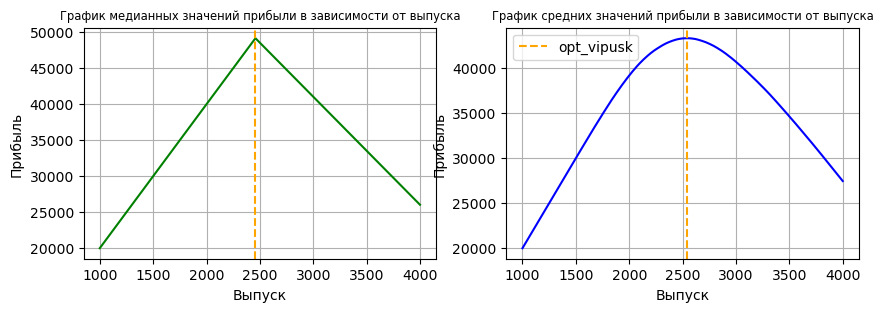

Средняя величина прибыли: 35469.81731566736
Медианная величина прибыли: 34960.0


In [81]:
medians=[]
medians=np.array(medians)
means=[]
means=np.array(means)
for i in range(3000):
    medians=np.append(medians, np.median(pribil[:,i])) #вытаскиваем из матрицы прибыли столбцы,отвечающие за выпуск и в каждом считаем медиану и среднее
    means=np.append(means, np.mean(pribil[:,i]))   
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,3))
ax2.plot(np.arange(1000,4000),means,color='b') #рисуем
ax2.set_title('График средних значений прибыли в зависимости от выпуска',size='small')
ax2.set_xlabel('Выпуск')
ax2.set_ylabel('Прибыль')
ax2.axvline(np.arange(1000,4000)[np.argmax(means)],label='opt_vipusk',linestyle='--',color='orange')
ax2.grid(True)
ax1.plot(np.arange(1000,4000),medians,color='g')
ax1.set_title('График медианных значений прибыли в зависимости от выпуска',size='small')
ax1.set_xlabel('Выпуск')
ax1.set_ylabel('Прибыль')
ax1.axvline(np.arange(1000,4000)[np.argmax(medians)],label='opt_vipusk',linestyle='--',color='orange')
ax1.grid(True)
plt.legend()
plt.show()
print('Средняя величина прибыли:',np.mean(pribil))
print('Медианная величина прибыли:',np.median(pribil))

## Ответ на второй вопрос
Какой из этих графиков окажется эффективнее для определения оптимального выпуска?
Обратим внимание на то,что функция,отражающая график средних значений в зависимости от выпуска - выпукла.Следовательно,она наиболее точно отображает действительность.

In [65]:
print('Оптимальный выпуск:',np.arange(1000,4000)[np.argmax(means)],'коробок печенья в день' )
print('Количество изготавливаемого печенья для оптимального выпуска:',np.arange(1000,4000)[np.argmax(means)]*12)
print('При таком выпуске,прибыль- максимальна и равна',means.max())

Оптимальный выпуск: 2543 коробок печенья в день
Количество изготавливаемого печенья для оптимального выпуска: 30516
При таком выпуске,прибыль- максимальна и равна 43281.92427640324


## Ответ на третий вопрос

In [66]:
def minusi_firmi(demand): #считаем потери фирмы при недостатке выпуска и излишке при оптимальном выпуске
   minusi_nedostatki=[] #массив для недостатков
   minusi_izlishki=[] #массив для излишков
   minusi_nedostatki=np.array(minusi_nedostatki)
   minusi_izlishki=np.array(minusi_izlishki)
   v=np.arange(1000,4000)[np.argmax(means)]
   for i in range(n):
           if demand[i]<v:
               minusi_izlishki = np.append(minusi_izlishki,((demand[i]-v)*15)) #при излишке фирма теряет 15 руб для каждой лишней единицы коробки
           else:
               minusi_nedostatki=np.append(minusi_nedostatki,(v-demand[i])*(50-30)) #при недостатке она теряет 20 руб для каждой нереализованной единицы продукта
   return(minusi_nedostatki,minusi_izlishki)
minusi=minusi_firmi(demand)
minusi_izlishki=minusi_firmi(demand)[1]
minusi_nedostatki=minusi_firmi(demand)[0]
print('При излишке товара при оптимальном выпуске,фирма в среднем теряет:',np.mean(minusi_izlishki))
print('При дефиците товара при оптимальном выпуске,фирма в среднем теряет:',np.mean(minusi_nedostatki))
print('Фирма теряет в среднем при излишке и дефиците при оптимальном выпуске:',np.mean(np.concatenate(minusi)))

При излишке товара при оптимальном выпуске,фирма в среднем теряет: -5677.878913783783
При дефиците товара при оптимальном выпуске,фирма в среднем теряет: -8204.478171926407
Фирма теряет в среднем при излишке и дефиците при оптимальном выпуске: -6759.263396268827


## Проделаем ту же самую работу,но при стандартном отклонении=1000

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import math
mean=math.log(2500**2/np.sqrt(2500**2+1000**2),np.exp(1))
sigma=np.sqrt(math.log(1+(1000**2/2500**2),np.exp(1)))
n=500
np.random.seed(42)
demand=np.random.lognormal(mean,sigma,n)
def pure_revenue(demand): 
    matrix=np.zeros((n,5400))
    for i in np.arange(100,5500): #также согласно правилу 3 сигм подбираем границы выпуска
        for j in range(n):
            if demand[j]-i<0:
                matrix[j,i-100]=15*(demand[j]-i)+20*demand[j]
            else:
                matrix[j,i-100]=20*i
    return(matrix)
pribil=pure_revenue(demand)
pribil

array([[  2000.        ,   2020.        ,   2040.        , ...,
         15920.27409062,  15905.27409062,  15890.27409062],
       [  2000.        ,   2020.        ,   2040.        , ...,
         -5427.53624083,  -5442.53624083,  -5457.53624083],
       [  2000.        ,   2020.        ,   2040.        , ...,
         21811.78484058,  21796.78484058,  21781.78484058],
       ...,
       [  2000.        ,   2020.        ,   2040.        , ...,
         -6957.44952653,  -6972.44952653,  -6987.44952653],
       [  2000.        ,   2020.        ,   2040.        , ...,
        -24475.23427673, -24490.23427673, -24505.23427673],
       [  2000.        ,   2020.        ,   2040.        , ...,
        -34765.99773857, -34780.99773857, -34795.99773857]])

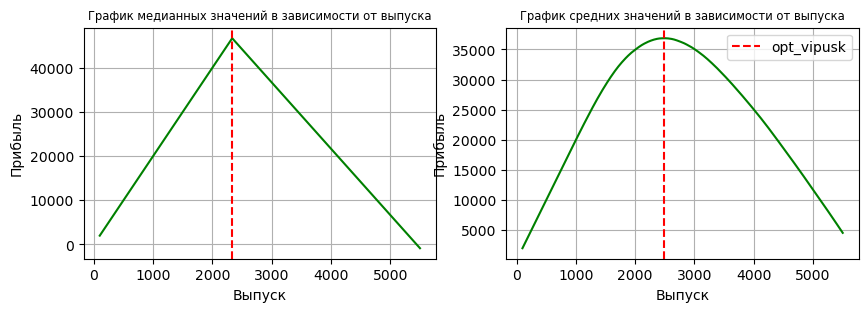

Средняя величина прибыли: 23652.93220361959
Медианная величина прибыли: 23510.732776660836


In [76]:
medians=[]
medians=np.array(medians)
means=[]
means=np.array(means)
for i in range(5400):
    medians=np.append(medians, np.median(pribil[:,i]))
    means=np.append(means, np.mean(pribil[:,i]))   
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,3))
ax2.plot(np.arange(100,5500),means,color='g')
ax2.set_title('График средних значений в зависимости от выпуска',size='small')
ax2.set_xlabel('Выпуск')
ax2.set_ylabel('Прибыль')
ax2.grid(True)
ax1.plot(np.arange(100,5500),medians,color='g')
ax1.grid(True)
ax1.set_xlabel('Выпуск')
ax1.set_ylabel('Прибыль')
ax1.set_title('График медианных значений в зависимости от выпуска',size='small')
ax1.axvline(np.arange(100,5500)[np.argmax(medians)],label='opt_vipusk',linestyle='--',color='red')
ax2.axvline(np.arange(100,5500)[np.argmax(means)],label='opt_vipusk',linestyle='--',color='red')
plt.legend()
plt.show()
print('Средняя величина прибыли:',np.mean(means))
print('Медианная величина прибыли:',np.median(medians))

In [72]:
print('Оптимальный выпуск:',np.arange(0,5500)[np.argmax(means)],'коробок печенья в день' )
print('Количество изготавливаемого печенья для оптимального выпуска:',np.arange(0,5500)[np.argmax(means)]*12)
print('При таком выпуске,прибыль- максимальна и равна',means.max())

Оптимальный выпуск: 2393 коробок печенья в день
Количество изготавливаемого печенья для оптимального выпуска: 28716
При таком выпуске,прибыль- максимальна и равна 36856.8774056085


In [75]:
def minusi_firmi(demand):
   minusi_nedostatki=[]
   minusi_izlishki=[]
   minusi_nedostatki=np.array(minusi_nedostatki)
   minusi_izlishki=np.array(minusi_izlishki)
   v=np.arange(0,5500)[np.argmax(means)]
   for i in range(n):
           if demand[i]<v:
               minusi_izlishki = np.append(minusi_izlishki,((demand[i]-v)*15))
           else:
               minusi_nedostatki=np.append(minusi_nedostatki,(v-demand[i])*(50-30))
   return(minusi_nedostatki,minusi_izlishki)
minusi=minusi_firmi(demand)
minusi_izlishki=minusi_firmi(demand)[1]
minusi_nedostatki=minusi_firmi(demand)[0]
print('При излишке товара при оптимальном выпуске,фирма в среднем теряет:',np.mean(minusi_izlishki))
print('При дефиците товара при оптимальном выпуске,фирма в среднем теряет:',np.mean(minusi_nedostatki))
print('Фирма теряет в среднем при излишке и дефиците при оптимальном выпуске:',np.mean(np.concatenate(minusi)))

При излишке товара при оптимальном выпуске,фирма в среднем теряет: -8913.488075641422
При дефиците товара при оптимальном выпуске,фирма в среднем теряет: -18253.49901043583
Фирма теряет в среднем при излишке и дефиците при оптимальном выпуске: -13284.613193125204


### Исходя из проделанной работы и вычислений,становится очевидным,что при большом отклонении от выпсука мы получаем меньшую прибыль и бОльшие потери